District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [13011, 4521, 31537, 19119, 7454, 15096, 12193, 1802, 2442, 5238, 2568]


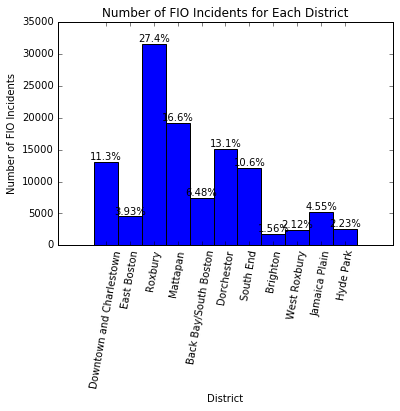

Race:  ['Black', 'White', 'Hispanic', 'Asian or Pacific Islander', 'Middle Eastern or East Indian', 'American Indian or Alaskan Native']
Counts based on Race:  [67968, 25645, 15402, 953, 355, 54]


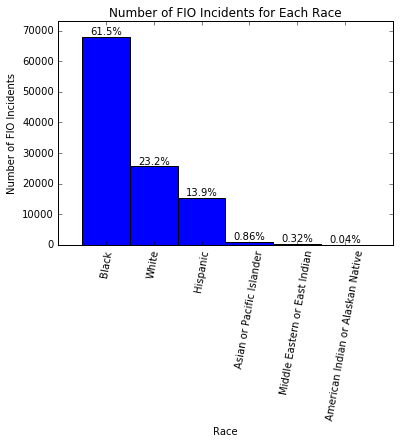

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [16729, 54010, 21833, 11994, 6221, 1099, 237]


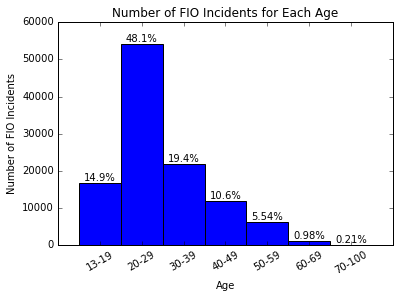

Sex:  ['FEMALE', 'MALE']
Counts based on Sex:  [13204, 102175]


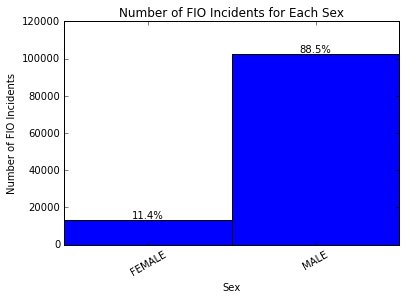

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [15977, 17699, 17021, 17317, 18119, 16835, 12580]


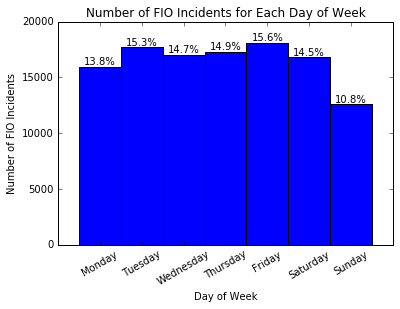

{'W(White)': [(2012, 9164), (2013, 7277), (2014, 7367), (2015, 1837)], 'B(Black)': [(2012, 22318), (2013, 19981), (2014, 20024), (2015, 5645)], 'A(Asian or Pacific Islander)': [(2012, 305), (2013, 349), (2014, 258), (2015, 41)], 'H(Hispanic)': [(2012, 5194), (2013, 4193), (2014, 4648), (2015, 1367)], 'M(Middle Eastern or East Indian)': [(2012, 78), (2013, 118), (2014, 126), (2015, 33)], 'I(American Indian or Alaskan Native)': [(2012, 19), (2013, 21), (2014, 10), (2015, 4)]}


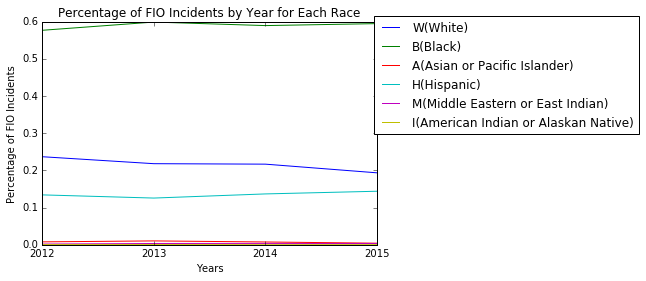

{'MALE': [(2012, 33924), (2013, 29287), (2014, 30400), (2015, 8564)], 'FEMALE': [(2012, 4725), (2013, 3994), (2014, 3562), (2015, 923)]}


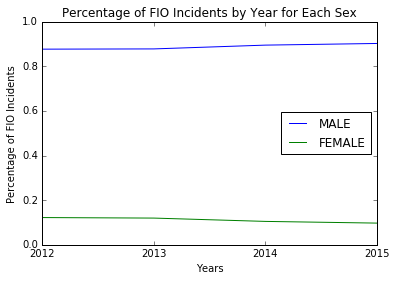

{'Tuesday': [(2012, 5804), (2013, 5244), (2014, 5225), (2015, 1426)], 'Friday': [(2012, 6109), (2013, 5170), (2014, 5277), (2015, 1563)], 'Sunday': [(2012, 4114), (2013, 3488), (2014, 3923), (2015, 1055)], 'Saturday': [(2012, 5493), (2013, 4890), (2014, 5012), (2015, 1440)], 'Monday': [(2012, 5711), (2013, 4503), (2014, 4620), (2015, 1143)], 'Thursday': [(2012, 5707), (2013, 5188), (2014, 4973), (2015, 1449)], 'Wednesday': [(2012, 5765), (2013, 4887), (2014, 4951), (2015, 1418)]}


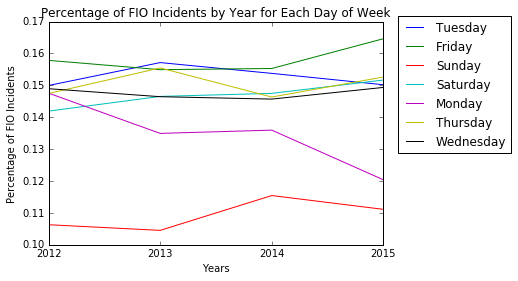

{'E5': [(2012, 798), (2013, 614), (2014, 795), (2015, 235)], 'B3': [(2012, 6402), (2013, 5509), (2014, 5662), (2015, 1546)], 'C6': [(2012, 2452), (2013, 1959), (2014, 2414), (2015, 629)], 'D4': [(2012, 4576), (2013, 3109), (2014, 3234), (2015, 1274)], 'C11': [(2012, 4896), (2013, 4581), (2014, 4584), (2015, 1035)], 'E18': [(2012, 1318), (2013, 569), (2014, 524), (2015, 157)], 'D14': [(2012, 625), (2013, 680), (2014, 380), (2015, 117)], 'E13': [(2012, 1199), (2013, 1283), (2014, 2085), (2015, 671)], 'A7': [(2012, 1740), (2013, 1020), (2014, 1392), (2015, 369)], 'A1 & A15': [(2012, 0), (2013, 0), (2014, 0), (2015, 0)], 'B2': [(2012, 10419), (2013, 9863), (2014, 8604), (2015, 2651)]}


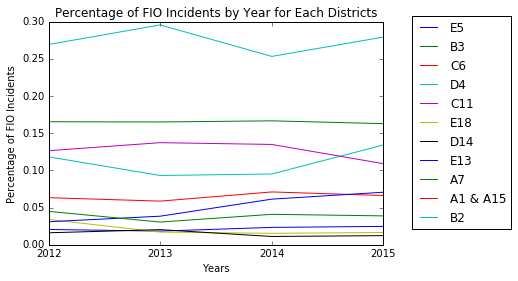

In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime
import math
    
def add_day_col_and_year_col(df):
    """
    Adds day of week column to the original fio df based on the date column.
    """
    date_col = df["FIO_DATE"]
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    dates = []
    years = []
    for date in date_col:
        d = date.split(" ")[0].split("/")
        wday = datetime.datetime(int(d[2]), int(d[0]), int(d[1])).weekday()
        dates +=[weekdays[wday]]
        years += [int(d[2])]
    df["DAY_OF_WEEK"] = dates
    df["YEAR"] = years
    return df

def order_days(days, counts):
    """
    Orders the days of the week in a more readable way before plotting.
    """
    if(counts is not None):     
        days = [days[1]] + days[5:7] + [days[4]] + [days[0]] + days[2:4]
        counts = [counts[1]] + counts[5:7] + [counts[4]] + [counts[0]] + counts[2:4]
        return days, counts
    else:
        days = [days[1]] + days[5:7] + [days[4]] + [days[0]] + days[2:4]
        return days

def order_districts(districts, counts):
    """
    Orders the districts in a more readable way before plotting.
    """

    if(counts is not None):
        districts = [districts[0] + " & " + districts[1]] + districts[2:5] + [districts[6]] + [districts[5]] + [districts[8]] + [districts[7]] + [districts[11]] + [districts[9]] + [districts[10]]
        counts = [counts[0] + counts[1]] + counts[2:5] + [counts[6]] + [counts[5]] + [counts[8]] + [counts[7]] + [counts[11]] + [counts[9]] + [counts[10]]
        return districts, counts
    else:
        districts = [districts[0] + " & " + districts[1]] +districts[2:5] + [districts[6]] + [districts[5]] + [districts[8]] + [districts[7]] + [districts[11]] + [districts[9]] + [districts[10]]
        return districts

def order_races(races, counts):
    for i in range(len(races)):
         races[i] = races[i].split("(")[1][:-1]
    
    if(counts is not None):
        races = [races[1]] + [races[5]] + [races[2]]+ [races[0]] + [races[4]] + [races[3]] 
        counts = [counts[1]] + [counts[5]] + [counts[2]]+ [counts[0]] + [counts[4]] + [counts[3]] 
        return races, counts
    else:
        races = [races[1]] + [races[5]] + [races[2]]+ [races[0]] + [races[4]] + [races[3]] 
        return races
            
    
def bin_ages(ages, counts):
    """
    Creates bins for the categories of ages before plotting.
    """
    binned_ages = ["13-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-100"]
    binned_counts = [0] * 7
    for i in range(len(ages)):
        a = ages[i]
        count = counts[i]
        if a >= 13 and a <= 19:
            binned_counts[0] += counts[i]
        if a >= 20 and a <= 29:
            binned_counts[1] += counts[i]
        if a >= 30 and a <= 39:
            binned_counts[2] += counts[i]
        if a >= 40 and a <= 49:
            binned_counts[3] += counts[i]
        if a >= 50 and a <= 59:
            binned_counts[4] += counts[i]
        if a >= 60 and a <= 69:
            binned_counts[5] += counts[i]
        if a >= 70 and a <= 100:
            binned_counts[6] += counts[i]
    return binned_ages, binned_counts

def plot_attribute(df, attribute, name, inclusion = None, exclusion = None, reorder_func = None, 
                           xlabels = None, label_rotation = 30, increase_ylim = False, increase = None, graph = "fio"):
    """
    parameters:
        df: original Pandas dataframe
        attribute: string, the column name of the Pandas dataframe that we are going to groupby
        name: string, the "name" of the column (what will be printed)
        inclusion: a collection that you would like these attributes to be a part of (used to filter results)
        exclusion: a collection that you would NOT like these attributes to be a part of (used to filter results)
        reorder_func: a function that orders the bars, creates bins, or manipulates the attribs and counts in any way
        xlabels: string, labels for the x-axis (by default the attribute names)
        label_rotation: int, rotation of x labels
        increase_ylim: boolean, makes the percentage labels more visible
    
    Plots the specificed attribute using the groupby function in a bar plot with shown percentages.
    """
    if(graph == "crime"):
        filtered_df = df.loc[df["Year"].isin(["2012", "2013", "2014", "2015"])]
    else:
        filtered_df = df.loc[df["YEAR"].isin([2012, 2013, 2014, 2015])]
        
    attr_groups = filtered_df.groupby(attribute)
    attribs, counts = [], []
 
    #obtain desired attributes and their respective counts
    for group in attr_groups:
        if(inclusion is not None and group[0] in inclusion):
            attribs += [group[0]]
            counts += [len(group[1])]
        elif(exclusion is not None and group[0] not in exclusion):
            attribs += [group[0]]
            counts += [len(group[1])]
        elif (exclusion is None and inclusion is None):
            attribs += [group[0]]
            counts += [len(group[1])]
    
    if(reorder_func is not None):
        attribs, counts = reorder_func(attribs, counts)
            
    print(name + ": ", attribs)
    print("Counts based on " + name + ": ", counts)
    
    #plot bar graph
    fig, ax = plt.subplots()
    rects = plt.bar(np.arange(len(attribs)), counts, align = "center", width = 1)
    
    if(increase_ylim and increase is None):
        print("Need to enter increase amount.")
    elif(increase_ylim):
        plt.ylim(0, max(counts) + increase) #increase y-axis height for label clarity
        
    if(graph == "crime"):
        plt.title("Number of Crimes for Each " + name)
        plt.ylabel("Number of Crimes")
    else:
        plt.title("Number of FIO Incidents for Each " + name)
        plt.ylabel("Number of FIO Incidents")

        
    plt.xlabel(name)
    
    if(xlabels is not None):
        plt.xticks(np.arange(len(attribs)), xlabels, rotation = label_rotation)
    else:
        plt.xticks(np.arange(len(attribs)), attribs, rotation = label_rotation)
    
    total_count = sum(counts)
    
    #apply percentage labels on each bar
    for rect in rects:  
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,height,
            str((height/total_count) * 100)[:4] + "%", ha='center', va='bottom')
    plt.show()
    
    
def plot_attrib_by_year(df, attribute, name, inclusion = None, exclusion = None, reorder_func = None, 
                           xlabels = None, graph = "fio"):
    """
    parameters:
        df: original Pandas dataframe
        attribute: string, the column name of the Pandas dataframe that we are going to groupby
        name: string, the "name" of the column (what will be printed)
        inclusion: a collection that you would like these attributes to be a part of (used to filter results)
        exclusion: a collection that you would NOT like these attributes to be a part of (used to filter results)
        reorder_func: a function that orders the bars, creates bins, or manipulates the attribs and counts in any way
        xlabels: string, labels for the x-axis (by default the attribute names)
    
    Plots the specificed attribute by each year on a line plot using the groupby function.
    """

    #obtain year groups within a specified range
    year_groups = [group for group in df.groupby("YEAR") if group[0] < 2016 and group[0] > 2011]
    
    #obtain year labels and total number of FIO incidents per year
    years, num_fio_per_year = [], []
    for group in year_groups:
        years += [group[0]]
        num_fio_per_year += [len(group[1])]
    
    #get attribute groups
    attrib_groups = df.groupby(attribute)
    
    #obtain attributes (filtering out bad entries)
    attribs = []
    for group in attrib_groups:
        if(inclusion is not None and group[0] in inclusion):
            attribs += [group[0]]
        elif(exclusion is not None and group[0] not in exclusion):
            attribs += [group[0]]
        elif (exclusion is None and inclusion is None):
            attribs += [group[0]]
    
    #reorder if desired (for graph visibility)
    if(reorder_func is not None):
        attribs = reorder_func(attribs, None)
    
    #determine the number of incidents for each race, each year
    year_counts =[]
    for year in year_groups: 
        year_counts += [(year[0], year[1].groupby(attribute).count()["SEQ_NUM"])]
    
    #create a dictionary for easy plotting of this information
    attrib_dict = {}
    for year, y_count in year_counts:
        for attrib in attribs:
            try:
                count = y_count[attrib]
            except:
                count = 0
            if(attrib not in attrib_dict):
                attrib_dict[attrib] = [(year, count)]
            else:
                attrib_dict[attrib] += [(year, count)]
    
    print(attrib_dict)
    
    #plot each attrib as a separate line on a line graph with each year as the x-axis and
    #the number of FIO incidents as the y-axis
    fig, ax = plt.subplots()
    
    if(graph == "fio"):
        plt.title("Percentage of FIO Incidents by Year for Each " + name)
        plt.ylabel("Percentage of FIO Incidents")
    else:
        plt.title("Percentage of Crimes by Year for Each " + name)
        plt.ylabel("Percentage of Crimes")
    
    plt.xlabel("Years")
    plt.xticks(range(len(years)), years)
    
    for key in attrib_dict:
        attrib_counts = []
        for year, total in zip(attrib_dict[key], num_fio_per_year):
            attrib_counts += [year[1]/total]    #normalize the data
        plt.plot(attrib_counts, label = key)
    
    #positioning the legend
    if(attribute == "RACE_DESC"):
        ax.legend(bbox_to_anchor=(1.8, 1.05))
    elif(attribute == "DAY_OF_WEEK"):
        ax.legend(bbox_to_anchor=(1.4, 1.05))
    elif(attribute == "DIST"):
        ax.legend(bbox_to_anchor=(1.4, 1.05))
    else:
        plt.legend(loc='best')
    
    plt.show()
        
       

fio_file = "datasets/bpd-field-interrogation-and-observation-reports.csv"
fio_df = pd.read_csv(fio_file)
fio_df = add_day_col_and_year_col(fio_df)
district_names = ["Downtown and Charlestown", "East Boston", "Roxbury", "Mattapan", "Back Bay/South Boston", "Dorchestor", 
                      "South End", "Brighton", "West Roxbury", "Jamaica Plain", "Hyde Park"]

# display(fio_df)


#plotting attributes overall
plot_attribute(fio_df, "DIST", "District", inclusion = "A1A15A7B2B3C6C11D4D14E5E13E18", reorder_func = order_districts, 
                       xlabels = district_names, label_rotation = 80, graph = "fio")
plot_attribute(fio_df, "RACE_DESC", "Race", exclusion = "NO DATA ENTERED UNKNOWN", increase_ylim = True, 
                       increase = 5000, label_rotation=80, graph = "fio", reorder_func = order_races)
plot_attribute(fio_df, "AGE_AT_FIO_CORRECTED", "Age", inclusion = range(1, 101), reorder_func=bin_ages, graph = "fio")
plot_attribute(fio_df, "SEX", "Sex", exclusion = "UNKNOWN", graph = "fio")
plot_attribute(fio_df, "DAY_OF_WEEK", "Day of Week", reorder_func = order_days, graph = "fio")


#plotting attributes by year
plot_attrib_by_year(fio_df, "RACE_DESC", "Race", exclusion = "NO DATA ENTERED UNKNOWN", graph = "fio")
plot_attrib_by_year(fio_df, "SEX", "Sex", exclusion = "UNKNOWN", graph = "fio")
plot_attrib_by_year(fio_df, "DAY_OF_WEEK", "Day of Week", reorder_func = order_days, graph = "fio")
plot_attrib_by_year(fio_df, "DIST", "Districts", inclusion = "A1A15A7B2B3C6C11D4D14E5E13E18", reorder_func = order_districts, graph = "fio")

Number of reported FIO Incidents between 2012-2015:  115548
Number of reported Crimes between 2012-2015:  268056

Number of reported FIO Incidents in 2012:  38703
Number of reported Crimes between in 2012:  43186

Number of reported FIO Incidents in 2013:  33370
Number of reported Crimes between in 2013:  87052

Number of reported FIO Incidents in 2014:  33981
Number of reported Crimes between in 2014:  88058

Number of reported FIO Incidents in 2015:  9494
Number of reported Crimes between in 2015:  49760


FIO_District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
FIO Counts based on District:  [0.15309654862048672, 0.04898397202894035, 0.3497074808737494, 0.20944542527780663, 0.08015716412226953, 0.17815972582822723, 0.14649323224980096, 0.02047633883753938, 0.03119915532938692, 0.058590369370304984, 0.0356302142832416]

Crime_District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Crime Counts based on District:  [0.1

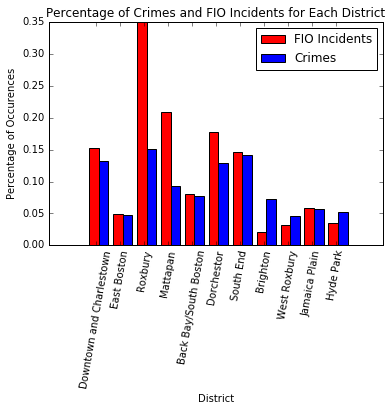

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [38256, 37911, 38392, 38627, 42031, 38446, 34393]


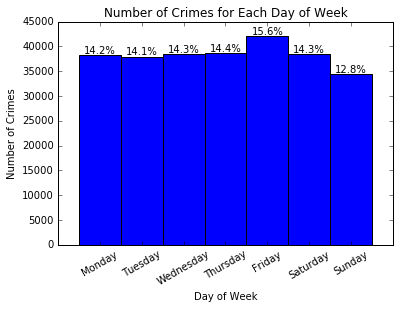

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [35274, 12783, 40640, 24812, 20767, 34609, 37908, 19520, 12226, 15167, 13985]


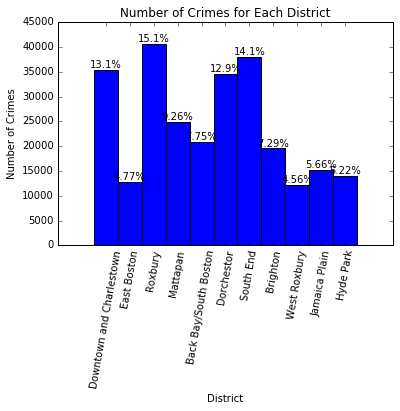

In [3]:
def get_total_counts(fio_df, crime_df):
    f_groups = fio_df.groupby("YEAR")
    f_group_2012 = f_groups.get_group(2012)
    f_group_2013 = f_groups.get_group(2013)
    f_group_2014 = f_groups.get_group(2014)
    f_group_2015 = f_groups.get_group(2015)
    num_fio = len(f_group_2012) + len(f_group_2013) + len(f_group_2014) + len(f_group_2015)

    c_groups = crime_df.groupby("Year")
    c_group_2012 = c_groups.get_group("2012")
    c_group_2013 = c_groups.get_group("2013")
    c_group_2014 = c_groups.get_group("2014")
    c_group_2015 = c_groups.get_group("2015")
    num_crimes = len(c_group_2012) + len(c_group_2013) + len(c_group_2014) + len(c_group_2015)
    
    
    print("Number of reported FIO Incidents between 2012-2015: ", num_fio)
    print("Number of reported Crimes between 2012-2015: ", num_crimes)
    print()
    print("Number of reported FIO Incidents in 2012: ", len(f_group_2012))
    print("Number of reported Crimes between in 2012: ", len(c_group_2012))
    print()
    print("Number of reported FIO Incidents in 2013: ", len(f_group_2013))
    print("Number of reported Crimes between in 2013: ", len(c_group_2013))
    print()
    print("Number of reported FIO Incidents in 2014: ", len(f_group_2014))
    print("Number of reported Crimes between in 2014: ", len(c_group_2014))
    print()
    print("Number of reported FIO Incidents in 2015: ", len(f_group_2015))
    print("Number of reported Crimes between in 2015: ", len(c_group_2015))
    print("\n")
    
    
    return num_fio, num_crimes

def plot_fio_and_crime_districts(f_df,c_df, fio_attrib, crime_attrib, name, inclusion = None, exclusion = None, 
                                 reorder_func = None, xlabels = None, 
                                 label_rotation = None):
    

    filtered_f_df = f_df.loc[f_df["YEAR"].isin([2012, 2013, 2014, 2015])]
    filtered_c_df = c_df.loc[c_df["Year"].isin(["2012", "2013", "2014", "2015"])]
  
    fio_attr_groups = f_df.groupby(fio_attrib)
    crime_attr_groups = c_df.groupby(crime_attrib)
    fio_attribs, fio_counts, crime_attribs, crime_counts = [], [], [], []
         
    #obtain desired attributes and their respective counts for fio_data
    for fio_group in fio_attr_groups:
        if(inclusion is not None and fio_group[0] in inclusion):
            fio_attribs += [fio_group[0]]
            fio_counts += [len(fio_group[1])]
        elif(exclusion is not None and fio_group[0] not in exclusion):
            fio_attribs += [fio_group[0]]
            fio_counts += [len(fio_group[1])]
        elif (exclusion is None and inclusion is None):
            fio_attribs += [fio_group[0]]
            fio_counts += [len(fio_group[1])]
    
    #obtain desire attributes and their respective counts for crime_data
    for crime_group in crime_attr_groups:
        if(inclusion is not None and crime_group[0] in inclusion):
            crime_attribs += [crime_group[0]]
            crime_counts += [len(crime_group[1])]
        elif(exclusion is not None and crime_group[0] not in exclusion):
            crime_attribs += [crime_group[0]]
            crime_counts += [len(crime_group[1])]
        elif (exclusion is None and inclusion is None):
            crime_attribs += [crime_group[0]]
            crime_counts += [len(crime_group[1])]
      
    

    if(reorder_func is not None):
        fio_attribs, fio_counts = reorder_func(fio_attribs, fio_counts)
        crime_attribs, crime_counts = reorder_func(crime_attribs, crime_counts)  
        
    
    total_f_count, total_c_count = get_total_counts(fio_df, crime_df)
    
    norm_fio_counts, norm_crime_counts = [], []
    for f_count, c_count in zip(fio_counts, crime_counts):
        norm_fio_counts += [f_count/total_f_count]
        norm_crime_counts += [c_count/total_c_count]
        
    
    print("FIO_" + name + ": ", fio_attribs)
    print("FIO Counts based on " + name + ": ", norm_fio_counts)
    print()
    print("Crime_" + name + ": ", crime_attribs)
    print("Crime Counts based on " + name + ": ", norm_crime_counts)
    
    #plot bar graph
    fig, ax = plt.subplots()
    rects1 = plt.bar(np.arange(len(fio_attribs))-0.1, norm_fio_counts, align = "center", color = "r", width = 0.4, label = "FIO Incidents")
    rects2 = plt.bar(np.arange(len(crime_attribs))+0.3, norm_crime_counts, align = "center", width = 0.4, label = "Crimes")
        
    plt.title("Percentage of Crimes and FIO Incidents for Each " + name)
    plt.ylabel("Percentage of Occurences")        
    plt.xlabel(name)
    
    if(xlabels is not None):
        plt.xticks(np.arange(len(xlabels)), xlabels, rotation = label_rotation)
    else:
        plt.xticks(np.arange(len(fio_attribs)), fio_attribs, rotation = label_rotation)
    
    fio_total_count = sum(fio_counts)
    crime_total_count = sum(crime_counts)
    
        #gets too messy with multi-bar graphs it seems
#     apply percentage labels on each bar
#     for rect1, rect2 in zip(rects1, rects2):  
#         height1 = rect1.get_height()
#         height2 = rect2.get_height()
#         ax.text(rect1.get_x() + rect1.get_width()/2.,height1,
#             str((height1/fio_total_count) * 100)[:4] + "%", ha='right', va='bottom')
#         ax.text(rect2.get_x() + rect2.get_width()/2.,height2,
#             str((height2/crime_total_count) * 100)[:4] + "%", ha='left', va='bottom')
        
    ax.legend()
    plt.show()

path = "datasets/crime-indicent-reports-2012-2015.csv"
crime_df = pd.read_csv(path, dtype="unicode")

plot_fio_and_crime_districts(fio_df, crime_df, "DIST", "REPTDISTRICT", "District", inclusion = "A1A15A7B2B3C6C11D4D14E5E13E18", xlabels = district_names, label_rotation = 80,
                            reorder_func = order_districts)
plot_attribute(crime_df, "DAY_WEEK", "Day of Week", graph ="crime", reorder_func=order_days)
plot_attribute(crime_df, "REPTDISTRICT", "District", inclusion = "A1A15A7B2B3C6C11D4D14E5E13E18", xlabels = district_names, label_rotation = 80, graph = "crime", 
               reorder_func=order_districts)

In [4]:
def find_priors(df):
    """
    Finds the percentage of FIO incidents involving people with and without a prior record.
    """
    df = df.fillna("")
    priors_col = df["PRIORS"]
    yes, no, total = 0, 0, 0
    for case in priors_col:
        if(case.lower() == "yes"):
            yes += 1
            total += 1
        elif(case.lower() == "no"):
            no += 1
            total +=1
            
    yes_percent = (yes/total) * 100
    no_percent = (no/total) * 100
    print("{:.2f}% of FIO Incidents involved people with a prior record.".format(yes_percent))
    print("{:.2f}% of FIO Incidents involved people with NO prior record.\n".format(no_percent))
            
def find_stop_reasons(df):
    """
    Finds the percentage of FIOFS reasons listed as "INVESTIGATE, PERSON".
    """
    df = df.fillna("")
    reasons_col = df["FIOFS_REASONS"]
    
    num_investigate_person, other, total = 0,0,0
    for reason in reasons_col:
        if("investigate, person" in reason.lower()):
            num_investigate_person += 1
            total += 1
        elif(reason.lower() != ""):
            other += 1
            total += 1
    percentage = (num_investigate_person/total) * 100
    other_percentage = (other/total) * 100
    print("{:.2f}% of FIO Incidents have the FIOFS reason listed as 'INVESTIGATE, PERSON'".format(percentage))
    print("{:.2f}% of FIO Incidents do NOT have the FIOFS reason listed as 'INVESTIGATE, PERSON'\n".format(other_percentage))

def groupby_officers(df):
    """
    Looks at the offices and sees how my FIO's were reported by each officer.
    """
    officer_groups = df.groupby("OFFICER_ID")
    officers = [group[0] for group in officer_groups]
    same_officer = [len(group[1]) for group in officer_groups]
    sorted_officers = np.sort(same_officer)
    officer = officers[np.argsort(same_officer)[-1]]
    print("The maximum number of FIO incidents done by an officer from 2012-2015 is {:,d}.".format(sorted_officers[-1]))
    print("Officer ID: ", officer)
    
    

        

find_priors(fio_df)
find_stop_reasons(fio_df)
groupby_officers(fio_df)

87.26% of FIO Incidents involved people with a prior record.
12.74% of FIO Incidents involved people with NO prior record.

61.99% of FIO Incidents have the FIOFS reason listed as 'INVESTIGATE, PERSON'
38.01% of FIO Incidents do NOT have the FIOFS reason listed as 'INVESTIGATE, PERSON'

The maximum number of FIO incidents done by an officer from 2012-2015 is 2,980.
Officer ID:  107106
